# DTSC-580: Data Manipulation
## Assignment: Fandango Movie Ratings

### Name:

## Data

Our data set comes from the data journalism site, [FiveThirtyEight](https://fivethirtyeight.com/), and was used for a 2015 article titled '[Be Suspicious Of Online Movie Ratings, Especially Fandango’s](https://fivethirtyeight.com/features/fandango-movies-ratings/)'.  The first step of this project is to read this article as it sets up the rest of this assignment and so that you will understand the data.

## Assignment

In this assignment, we will use Pandas to explore the data set from the article.  Our data will be slightly different than the article as it appears they were working with a larger set of data.  When you have finished the assignment, make sure that you save your file as `fandango.ipynb` and submit to CodeGrade for automatic grading.


## Note

<u>Show Work</u>

Remember that you must show your work.  Students submissions are spot checked manually throughout the term to verify that they are not hard coding the answer from looking only in the file or in CodeGrade's expected output.  If this is seen, the student's answer will be manually marked wrong and their grade will be changed to reflect this.  If this is a recurring issue, you could fail the assignment without a chance to resubmit.

For example, if the answer to Q1, the mean of a specific column, is 22:
```
# correct way
Q1 = df['column_name'].mean()

# incorrect way
Q1 = 22 
```
First, let's import our basic libraries and set the option to display all columns in the data.

In [1]:
import pandas as pd
import numpy as np

# set display columns - Do not change or CodeGrade may not function correctly
pd.set_option('display.max_columns', None)

**Exercise:** Import the data from the `fandango.csv` file and save as a DataFrame called `fandango`.  Look at the first five rows.

In [27]:
### ENTER CODE HERE ###

fandango = pd.read_csv('fandango.csv')
fandango

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,3.35,3.95,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,4.15,3.75,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,4.45,4.40,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,4.50,3.65,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


As you can see, this data contains the review scores for four review sites: Rotten Tomatoes, Metacritic, IMDB, and Fandango.  These sites use different methodologies in terms of ratings, and Rotten Tomatoes and Metacritic have separate critic scores and user scores.

According to the 538 article, the columns with 'norm' in the column name are scores that have been normalized to the five-star rating scale that Fandango uses and the columns with 'norm_round' in the column name are those columns rounded to the nearest half-star.

**Exercise:** Use `.info()` to obtain more information about the columns, number of entries, number of missing values (if any), and the data type for each column.

In [28]:
### ENTER CODE HERE ###
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

**Exercise:** Use `.describe()` to obtain a statistical overview of the data.

In [29]:
### ENTER CODE HERE ###
fandango.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,3.259589,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,0.755356,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,1.200000,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,2.850000,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,3.425000,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,3.750000,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,4.800000,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


There is already interesting information that we can see from this statistical overview if we compare Fandango's star ratings with the other review sites in terms of the mean, standard deviation, and minimum.

**Q1:** The article begins by talking about the movie: `Fantastic Four (2015)`. Index the `fandango` DataFrame and select only the row for this film.  Save it as `Q1`.

In [33]:
### ENTER CODE HERE ###
Q1 = fandango[fandango['FILM'] == 'Fantastic Four (2015)']
Q1

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
48,Fantastic Four (2015),9,20,27,2.5,4.0,3.0,2.7,0.45,1.0,1.35,1.25,2.0,0.5,1.0,1.5,1.5,2.0,421,39838,6288,0.3


As you can see, the `Fandango_Stars` rating is `3.0` while if we look at the other ratings from the other review sites (looking at the columns with `norm` in the column name) you will notice the review scores being much lower.

**Q2:** Select the `Fandango_Stars` column as a Series and save it as `Q2A`.  What is the minimum score in the Series `Q2A`?  Save this minimum value as `Q2B`.

In [34]:
### ENTER CODE HERE ###
Q2A = pd.Series(fandango['Fandango_Stars'])


In [35]:
### ENTER CODE HERE ###
Q2B = Q2A.min()


**Q3:** What is the maximum `Fandango_Stars` score in the `fandango` data?  Save this as `Q3`.

In [36]:
### ENTER CODE HERE ###
Q3 = Q2A.max()
Q3

#fandango['Fandango_Stars'].max()

5.0

If you were to check the minimum and maximum ranges for the other review sites, you should notice that the range of scores for the Fandango star ratings is much more narrow.

**Q4:** What is the minimum score for `RT_norm_round`, `Metacritic_norm_round`, and `IMDB_norm_round`?  Save these three values in that order as a list and call it `Q4`.

In [37]:
### ENTER CODE HERE ###
Q4 = [fandango['RT_norm_round'].min(), fandango['Metacritic_norm_round'].min(),fandango['IMDB_norm_round'].min()]

Q4

[0.5, 0.5, 2.0]

**Q5:** What is the maximum score for `RT_norm_round`, `Metacritic_norm_round`, and `IMDB_norm_round`?  Save these three values in that order as a list and call it `Q5`.

In [38]:
### ENTER CODE HERE ###
Q5 = [fandango['RT_norm_round'].max(), fandango['Metacritic_norm_round'].max(),fandango['IMDB_norm_round'].max()]

Q5

[5.0, 4.5, 4.5]

As we saw above, the lowest rating for Fandango for a movie was three stars, while the rounded, normalized review stars for the other sites were much lower. The other sites also have a much wider range of values. 

Run the cell below to view boxplots of the various site's star ratings.  Notice the smaller range and higher minimum for the Fandango star ratings.

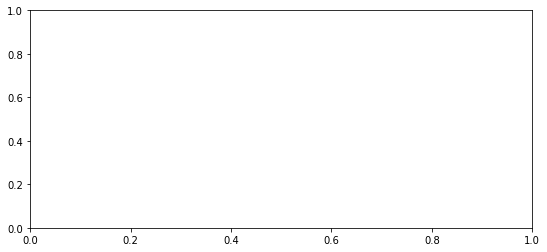

In [72]:
import matplotlib.pyplot as plt

data = fandango[['Fandango_Stars','RT_norm_round','Metacritic_norm_round','IMDB_norm_round']]
labels = ['Fandango', 'RT', 'Metacritic','IMDB']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

# rectangular box plot
#bplot1 = ax.boxplot(data,
#                     patch_artist=True,  # fill with color
#                     labels=labels)  # will be used to label x-ticks

#ax.set_title('Movie Stars Box Plots')

#plt.show()

**Q6:** Using `value_counts`, what is the breakdown of counts for the `Fandango_Stars` column sorted by the index?  Save this as `Q6A`.  

What is the breakdown of relative frequencies (percentages) of the unique values sorted by the index and rounded to 3 decimal places?  Check the Pandas `value_counts` documentation for help.  Save this as `Q6B`.

In [60]:
### ENTER CODE HERE ###
Q6A = fandango['Fandango_Stars'].value_counts().sort_index()



3.0    12
3.5    27
4.0    41
4.5    55
5.0    11
Name: Fandango_Stars, dtype: int64 
 3.0    0.082
3.5    0.185
4.0    0.281
4.5    0.377
5.0    0.075
Name: Fandango_Stars, dtype: float64


In [ ]:
### ENTER CODE HERE ###

Q6B = round(fandango['Fandango_Stars'].value_counts(normalize=True).sort_index(),3)

**Q7:** Given the output for `Q6B`, what is the sum of the frequency of values for 4 stars or more?  You may hard code this number and round to 2 decimals.  Save this as `Q7`.

In [65]:
### ENTER CODE HERE ###
Q7 = round(Q6B.iloc[2:5].sum(),2)


0.73

To give you a comparison to your output above, the sum of frequency values for 4 stars or more for the other sites are as follows:

- RT_norm_round = 0.419
- Metacritic_norm_round = 0.274
- IMDB_norm_round = 0.233

You should see that the output for `Q7` is higher, which is one indication that Fandango rates their movies with higher overall scores.

**Q8:** In the article, the author "normalized" the data by turning the sites with 0-100 ranges to 0-5 ranges.  Create a Series called `Q8` that takes the values in the `RottenTomatoes` column and normalizes them to 0-5 ranges.  To double check your calculation, your Series should match exactly the `RT_norm` column.

For example: A score of 100 will equal a new score of 5.00, a score of 50 will equal a new score of 2.50, a score of 20 will equal a new score of 1, etc.  You should be able to calculate this with one line of code.

In [75]:
### ENTER CODE HERE ###
Q8 = fandango['RottenTomatoes'] / 20
Q8



0      3.70
1      4.25
2      4.00
3      0.90
4      0.70
       ... 
141    4.35
142    4.85
143    4.85
144    5.00
145    4.35
Name: RottenTomatoes, Length: 146, dtype: float64

In [74]:
# double check your above code - This should output 0
(fandango['RT_norm'] != Q8).sum()

0

**Q9:** 
- First create a copy of the `fandango` DataFrame and call this `Q9A`.  
- Create a new column in the `Q9A` DataFrame called `f_rt_norm` that is the `Fandango_Stars` column minus the `RT_norm_round` column.  
- Select only the films where the `RT_norm_round` was higher (the `f_rt_norm` is negative) and save this as `Q9B`.

In [81]:
### ENTER CODE HERE ###

Q9A = fandango.copy()
Q9A['f_rt_norm'] = Q9A['Fandango_Stars'] - Q9A['RT_norm_round']
Q9B = Q9A[Q9A['f_rt_norm']<0]


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,f_rt_norm
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,4.05,3.40,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5,-0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,4.05,4.40,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5,-0.5
12,Leviathan (2014),99,79,92,7.2,7.7,4.0,3.5,4.95,3.95,4.60,3.60,3.85,5.0,4.0,4.5,3.5,4.0,145,22521,64,0.5,-1.0
28,Wild Tales (2014),96,92,77,8.8,8.2,4.5,4.1,4.80,4.60,3.85,4.40,4.10,5.0,4.5,4.0,4.5,4.0,107,50285,235,0.4,-0.5
30,Red Army (2015),96,86,82,7.4,7.7,4.5,4.1,4.80,4.30,4.10,3.70,3.85,5.0,4.5,4.0,3.5,4.0,11,2275,54,0.4,-0.5
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,4.0,3.6,4.70,3.50,3.75,3.45,3.45,4.5,3.5,4.0,3.5,3.5,14,1151,281,0.4,-0.5
41,Timbuktu (2015),99,78,91,6.9,7.2,4.0,3.6,4.95,3.90,4.55,3.45,3.60,5.0,4.0,4.5,3.5,3.5,37,6246,74,0.4,-1.0
42,About Elly (2015),97,86,87,9.6,8.2,4.0,3.6,4.85,4.30,4.35,4.80,4.10,5.0,4.5,4.5,5.0,4.0,23,20659,43,0.4,-1.0
43,The Diary of a Teenage Girl (2015),95,81,87,6.3,7.0,4.0,3.6,4.75,4.05,4.35,3.15,3.50,5.0,4.0,4.5,3.0,3.5,18,1107,38,0.4,-1.0
65,Birdman (2014),92,78,88,8.0,7.9,4.0,3.7,4.60,3.90,4.40,4.00,3.95,4.5,4.0,4.5,4.0,4.0,1171,303505,4194,0.3,-0.5


**Q10 & Q11:** 
- Perform the same action as above creating two new columns in `Q9A` by subtracting the `Metacritic_norm_round` and `IMDB_norm_round` from `Fandango_Stars` and calling the columns `f_mc_norm` and `f_imdb_norm` respectively and in that order.  
- Select the rows where `f_mc_norm` is negative and save this as `Q10`.
- Select the rows where `f_imdb_norm` is negative and save this as `Q11`.

In [82]:
### ENTER CODE HERE ###
Q9A['f_mc_norm'] = Q9A['Fandango_Stars'] - Q9A['Metacritic_norm_round']
Q9A['f_imdb_norm'] = Q9A['Fandango_Stars'] - Q9A['IMDB_norm_round']



In [84]:
### ENTER CODE HERE ###
Q10 = Q9A[Q9A['f_mc_norm']<0]
Q11 = Q9A[Q9A['f_imdb_norm']<0]

**Q12:** What are the means of the `f_rt_norm`, `f_mc_norm`, and `f_imdb_norm` columns rounded to 3 decimal places.  Put these three averages into a list called `Q12`.

In [87]:
### ENTER CODE HERE ###
Q12 = [round(Q9A['f_rt_norm'].mean(),3), round(Q9A['f_mc_norm'].mean(),3), round(Q9A['f_imdb_norm'].mean(),3)]


[1.024, 1.116, 0.709]

**Q13:** What are the median values of the `f_rt_norm`, `f_mc_norm`, and `f_imdb_norm` columns.  Put these three median values into a list called `Q13`.

In [88]:
### ENTER CODE HERE ###
Q13 = [round(Q9A['f_rt_norm'].median(),3), round(Q9A['f_mc_norm'].median(),3), round(Q9A['f_imdb_norm'].median(),3)]

**Q14:** The article mentions the movie `Avengers: Age of Ultron (2015)`.  Select this film in the `fandango` data and save this as `Q14`.

In [94]:
### ENTER CODE HERE ###
Q14 = fandango[fandango['FILM']=='Avengers: Age of Ultron (2015)']

**Q15:** Select only the `FILM`, `Fandango_Stars`, and `Fandango_Ratingvalue` columns from `Q14` and save it as `Q15`.

In [100]:
### ENTER CODE HERE ###
Q15 = Q14[['FILM','Fandango_Stars','Fandango_Ratingvalue']]


,FILM,Fandango_Stars,Fandango_Ratingvalue
0,Avengers: Age of Ultron (2015),5.0,4.5


As was mentioned in the article, you can see that this movie gained an entire half star between the actual rating score and the stars score.

**Q16:** Index the `fandango` DataFrame and select all movies with an `IMDB` score of 8 or higher.  Save this DataFrame as `Q16`.

In [102]:
### ENTER CODE HERE ###
Q16=fandango[fandango['IMDB']>=8]

**Q17:** Index the `fandango` DataFrame and select all movies with a `RottenTomatoes` score of 100.  Save this DataFrame as `Q17`.

In [104]:
### ENTER CODE HERE ###
Q17 = fandango[fandango['RottenTomatoes']==100]


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
70,Seymour: An Introduction (2015),100,87,83,6.0,7.7,4.5,4.2,5.0,4.35,4.15,3.00,3.85,5.0,4.5,4.0,3.0,4.0,4,243,41,0.3
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.0,4.05,4.50,3.65,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


**Q18:** Index the `fandango` DataFrame and select all movies with a `Metacritic` score less than 20. Save this DataFrame as `Q18`.

In [105]:
### ENTER CODE HERE ###

Q18 = fandango[fandango['Metacritic']<20]

**Q19:** Index the `fandango` DataFrame and select all movies with a `RottenTomatoes_User` greater than 85, `Metacritic_User` score greater than 8.5, and an `IMDB` score greater than 8.5. Save this DataFrame as `Q19`.

In [106]:
### ENTER CODE HERE ###
Q19 = fandango[(fandango['RottenTomatoes_User']>85) & (fandango['Metacritic_User']>8.5) & (fandango['IMDB']>8.5)]

**Q20:** Sort the `fandango` DataFrame by the number of Fandango votes (in descending order) and save this new DataFrame as `fandango_sorted_value`.  Select only the films with more than 30,000 votes and save as `Q20` in descending order by number of votes.

In [109]:
### ENTER CODE HERE ###
fandango_sorted_value = fandango.sort_values(by='Fandango_votes',ascending=False)
Q20 = fandango_sorted_value[fandango_sorted_value['Fandango_votes']>30000]


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
97,Fifty Shades of Grey (2015),25,42,46,3.2,4.2,4.0,3.9,1.25,2.10,2.30,1.6,2.10,1.5,2.0,2.5,1.5,2.0,778,179506,34846,0.1
130,Jurassic World (2015),71,81,59,7.0,7.3,4.5,4.5,3.55,4.05,2.95,3.5,3.65,3.5,4.0,3.0,3.5,3.5,1281,241807,34390,0.0
72,American Sniper (2015),72,85,72,6.6,7.4,5.0,4.8,3.60,4.25,3.60,3.3,3.70,3.5,4.5,3.5,3.5,3.5,850,251856,34085,0.2
73,Furious 7 (2015),81,84,67,6.8,7.4,5.0,4.8,4.05,4.20,3.35,3.4,3.70,4.0,4.0,3.5,3.5,3.5,764,207211,33538,0.2


**Q21:** Using the above `Q20` DataFrame, select only the films that have a `Fandango_Stars` rating of `5` and save this DataFrame as `Q21`.

In [111]:
### ENTER CODE HERE ###
Q21 = Q20[Q20['Fandango_Stars']==5]

**Q22:** The article from 538 goes into detail about the rounding problem with the Fandango star scores.  Let's see if we can do better.  
- First create a copy of the `fandango` DataFrame and call it `Q22A`.  
- Create a new column called `Fandango_Stars_Revised` that rounds the `Fandango_Ratingvalue` column to the nearest half a star.  For example, 3.2 would round to 3.0, 3.3 would round to 3.5, 3.7 would round to 3.5, 3.8 would round to 4.0, etc.  
- Hint: [Check out this stackoverflow question for help](https://stackoverflow.com/questions/49164853/rounding-python-values-to-the-nearest-half-number)
- Select only the `FILM`, `Fandango_Ratingvalue`, and `Fandango_Stars_Revised` columns and save this DataFrame as `Q22B`.
- Code Check:  Select all movies with a `Fandango_Ratingvalue` of 3.7 and make sure that you rounded this to 3.5.  Select all movies with a `Fandango_Ratingvalue` of 3.8 and make sure that you rounded this to 4.0.

In [116]:
### ENTER CODE HERE ###
Q22A = fandango.copy()
Q22A['Fandango_Stars_Revised'] = Q22A.Fandango_Ratingvalue.mul(2).round().div(2)
Q22B = Q22A[['FILM','Fandango_Ratingvalue','Fandango_Stars_Revised']]



,FILM,Fandango_Ratingvalue,Fandango_Stars_Revised
77,Vacation (2015),3.8,4.0
78,Chappie (2015),3.8,4.0
80,Paper Towns (2015),3.8,4.0
81,Big Eyes (2014),3.8,4.0
83,Self/less (2015),3.8,4.0


**Q23:** Calculate the sum for the `Fandango_Difference` column and call this `Q23`.  Round to 2 decimals.

In [122]:
### ENTER CODE HERE ###

Q23 = fandango['Fandango_Difference'].sum().round(2)


35.6

**Q24:** 
- Create a new Series called `ser` by subtracting `Fandango_Ratingvalue` from `Fandango_Stars_Revised` from the `Q22A` DataFrame.  
- Calculate the sum of `ser` and call this `Q24`.  Round to 2 decimals.

In [127]:
### ENTER CODE HERE ###

ser = pd.Series(Q22A['Fandango_Stars_Revised']-Q22A['Fandango_Ratingvalue'])
Q24 = ser.sum().round(2)
Q24

-0.4

You should see that the sum for `ser` is much less than the sum of the `Fandango_Difference` column.  This makes sense as our `Fandango_Stars_Revised` column rounded to the closest half star instead of always rounding up like was done with the `Fandango_Stars` column as discussed in the 538 article.

**Q25:** Set the index of `fandango` as the `FILM` column and sort the index in ascending order.  Save this as `Q25`.

In [130]:
### ENTER CODE HERE ###
Q25 = fandango.set_index('FILM').sort_index()

Good work!

There is a lot more analysis that could be done with this data.  For further practice, we would encourage you to think of other questions and see if you can answer it with this data.  This would also be great practice for producing various Matplotlib and Seaborn plots to further analyze the data.